Gehe alle im Beispiel zur linearen Advection verwendeten Funktionen etc. durch und suche den zugehörigen Code aus Github zusammen. 

Betrachte zuerst einmal das Beispiel komplett und gehe dann die einzelnen Teile durch.

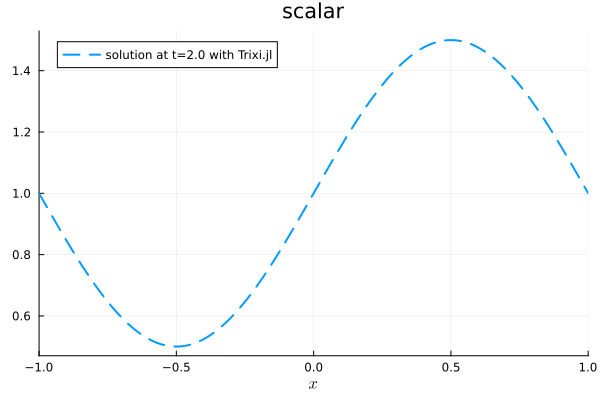

In [1]:
using Trixi, OrdinaryDiffEq, Plots

# equation with a advection_velocity of `1`.
advection_velocity = 1.0
equations = LinearScalarAdvectionEquation1D(advection_velocity)

#=
#Erweiterung für FV subcell
volume_flux = flux_lax_friedrichs
=#

# create DG solver with flux lax friedrichs and LGL basis
solver = DGSEM(polydeg=3, surface_flux=flux_lax_friedrichs)
#,volume_integral=VolumeIntegralPureLGLFiniteVolume(volume_flux))

# distretize domain with `TreeMesh`
coordinates_min = -1.0 # minimum coordinate
coordinates_max = 1.0 # maximum coordinate
mesh = TreeMesh(coordinates_min, coordinates_max,
                initial_refinement_level=4, # number of elements = 2^4
                n_cells_max=30_000)

# create initial condition and semidiscretization
initial_condition_sine_wave(x, t, equations) = SVector(1.0 + 0.5 * sin(pi * sum(x - equations.advection_velocity * t)))

semi = SemidiscretizationHyperbolic(mesh, equations, initial_condition_sine_wave, solver)

# solve
tspan = (0.0, 2.0)
ode_trixi  = semidiscretize(semi, tspan)
sol_trixi  = solve(ode_trixi, RDPK3SpFSAL49(), abstol=1.0e-6, reltol=1.0e-6, save_everystep=false);

plot(sol_trixi, label="solution at t=$(tspan[2]) with Trixi.jl", legend=:topleft, linestyle=:dash, lw=2)

In [2]:
equations = LinearScalarAdvectionEquation1D(advection_velocity)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ LinearScalarAdvectionEquation1D                                                                  │
│ ═══════════════════════════════                                                                  │
│ #variables: ………………………………………………… 1                                                                │
│ │ variable 1: …………………………………………… scalar                                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

[LinearScalarAdvectionEquation1D](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/equations/linear_scalar_advection_1d.jl)
ist das verwendete struct:


struct ist ein [composite data type](https://docs.julialang.org/en/v1/manual/types/#Composite-Types): analog zu struct in C/C++

zugehörige Funktionen des structs sind Objekte (analog zu C++,Python,Java,Ruby)

"<:" deklariert LinearScalarAdvectionEquation1D als subtyp von AbstractLinearScalarAdvectionEquation, abhängig von Dimension und Anzahl der Variablen, was wiederum ein subtyp von "AbstractEquations" ist

abstract types beschreiben dabei eine Menge von zusammengehörigen konkreten Typen

[supertype](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/basic_types.jl) ist "AbstractEquations",
[hier](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/equations/equations.jl) werden für "AbstractEquations" schonmal universelle Funktionen und Platzhalter gesetzt (z.B. physikalischer Fluss,Dirichlet BC, Entropy, Trafos) sowie die "abstract types" zusammengefasst



In [3]:
solver = DGSEM(polydeg=3, surface_flux=flux_lax_friedrichs)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ DG{Float64}                                                                                      │
│ ═══════════                                                                                      │
│ basis: ……………………………………………………………… LobattoLegendreBasis{Float64}(polydeg=3)                         │
│ mortar: …………………………………………………………… LobattoLegendreMortarL2{Float64}(polydeg=3)                      │
│ surface integral: ………………………………… SurfaceIntegralWeakForm                                          │
│ │ surface flux: ……………………………………… FluxLaxFriedrichs(max_abs_speed_naive)                           │
│ volume integral: …………………………………… VolumeIntegralWeakForm                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

[DGSEM](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/solvers/dgsem/dgsem.jl) setzt Löser als DG Verfahren mit LobattoLegendre Basis

die [DG Methoden](https://github.com/trixi-framework/Trixi.jl/tree/01e0231a9564943a5759ec193821a5f9b1de4e44/src/solvers) unerscheiden sich je nach verwendetem Gitter und Dimension

[hier](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/solvers/dgsem_tree/dg_1d.jl) ist die rhs! Funktion für die rechte Seite enthalten

In [4]:
# distretize domain with `TreeMesh`
coordinates_min = -1.0 # minimum coordinate
coordinates_max = 1.0 # maximum coordinate
mesh = TreeMesh(coordinates_min, coordinates_max,
                initial_refinement_level=4, # number of elements = 2^4
                n_cells_max=30_000)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TreeMesh{1, Trixi.SerialTree{1}}                                                                 │
│ ════════════════════════════════                                                                 │
│ center: …………………………………………………………… [0.0]                                                            │
│ length: …………………………………………………………… 2.0                                                              │
│ periodicity: ……………………………………………… (true,)                                                          │
│ current #cells: ……………………………………… 31                                                               │
│ maximum #cells: ……………………………………… 30000                                                            │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

[TreeMesh](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/meshes/tree_mesh.jl#L23-L27) ist kartesisches Gitter, basierend auf Hypercubes

das erste in Trixi implementierte Gitter, daher standard

unterstützt adaptive Gitterverfeinerung



In [5]:
# create initial condition and semidiscretization
initial_condition_sine_wave(x, t, equations) = SVector(1.0 + 0.5 * sin(pi * sum(x - equations.advection_velocity * t)))

initial_condition_sine_wave (generic function with 1 method)

In [6]:
semi = SemidiscretizationHyperbolic(mesh, equations, initial_condition_sine_wave, solver)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 1                                                                │
│ mesh: ………………………………………………………………… TreeMesh{1, Trixi.SerialTree{1}} with length 31                  │
│ equations: …………………………………………………… LinearScalarAdvectionEquation1D                                  │
│ initial condition: ……………………………… initial_condition_sine_wave                                      │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic                                  │
│ source terms: …………………………………………… nothing                                                          │
│ solver: …………………………………………………………… DG                                                       

[SemidiscretizationHyperbolic](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/semidiscretization/semidiscretization_hyperbolic.jl) ist wieder ein struct


erstellt cache, der alle wichtigen Informationen wie Gitter,Gleichungen und Löser enthält und übergibt diese an alle Funktionen auf niedrigerer Ebene




In [7]:
tspan = (0.0, 2.0)
ode_trixi  = semidiscretize(semi, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: 64-element Vector{Float64}:
 0.9999999999999999
 0.9458368155275491
 0.8598245137872117
 0.8086582838174551
 0.8086582838174551
 0.7597439986877508
 0.6868262901839228
 0.6464466094067263
 0.6464466094067263
 0.610227980121667
 ⋮
 1.3535533905932737
 1.3535533905932737
 1.3131737098160772
 1.2402560013122492
 1.191341716182545
 1.191341716182545
 1.1401754862127882
 1.0541631844724508
 1.0

[semidiscretization](https://github.com/trixi-framework/Trixi.jl/blob/01e0231a9564943a5759ec193821a5f9b1de4e44/src/semidiscretization/semidiscretization.jl) gibt ODE Problem aus, welches von ODE Lösern aus dem Package [DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/types/ode_types/) gelöst werden kann. Dabei wird "rhs!", "u0","tspan" und"semi" übergeben. "rhs" spielt die Rolle von "f!(du,u,p,t)" in einer [ODEFunction](https://docs.sciml.ai/DiffEqDocs/stable/types/ode_types/#SciMLBase.ODEFunction)."rhs!" ist eine in place function, d.h. du wird nicht explizit ausgegeben sonder wird innerhalb der Funktion modifiziert. (Julia erstellt keine Kopien wenn Funktionen durchlaufen werden, sondern überschreibt grundsätzlich den Input.)

In [8]:
sol_trixi  = solve(ode_trixi, RDPK3SpFSAL49(), abstol=1.0e-6, reltol=1.0e-6, save_everystep=false);


Methode aus dem DifferentialEquations.jl package. Alle ODE Löser sind [hier](https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Full-List-of-Methods) aufgeführt. "abstol" und "reltol" kontrollieren die Zeitschrittweite.